## Network Analysis v2

In [1]:
import random
from random import randint
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from sklearn import cluster

seed = 44

**Network Structure**

In [2]:
# Network initialization
people = 100
teams = 3
tools = 2
freq = [70, 30] # frequency of use of each tool

In [3]:
## define nodes
people_nodes = list(range(people))
tools_nodes = list(range(people, people+tools))
nodes = people_nodes + tools_nodes
print("nodes: ", nodes)

## define groups
# randomly assign people to teams
a, b = list(range(teams))[0], list(range(teams))[-1]
random.seed(seed)
people_group = [randint(a, b) for p in range(people)]
# assign tools to new groups
tools_group = list(range(b+1, tools+b+1))
groups = people_group + tools_group
print('groups: ', groups)

## define edges
edges = []
np.random.seed(seed)
for i, N in enumerate(freq):
    for rand_user in np.random.choice(people_nodes, size=N, replace=False):
        edges.append((rand_user, tools_nodes[i]))
print('edges: ', edges)

nodes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101]
groups:  [1, 2, 2, 2, 0, 0, 1, 0, 1, 0, 0, 0, 2, 0, 0, 0, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 0, 1, 1, 2, 0, 0, 2, 0, 2, 0, 1, 1, 0, 2, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 0, 0, 1, 1, 2, 2, 1, 2, 2, 0, 1, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1, 2, 0, 1, 0, 3, 4]
edges:  [(42, 100), (54, 100), (27, 100), (93, 100), (39, 100), (65, 100), (7, 100), (26, 100), (24, 100), (60, 100), (86, 100), (30, 100), (37, 100), (70, 100), (19, 100), (99, 100), (96, 100), (33, 100), (66, 100), (68, 100), (79, 100), (38, 100), (5, 100), (69, 100), (46,

**Creating Network Graph**

In [4]:
G = nx.Graph(day="network")

# assign nodes
for i, n in enumerate(nodes):
    G.add_node(n, group=groups[i])

# assign edges
G.add_edges_from(edges)

In [5]:
## Find not connected nodes and attribute them to a new tool
to_connect = []
for n in G.node:
    if list(G.neighbors(n)) == []:
        to_connect.append(n)

groups = groups + [max(groups)+1] 
G.add_node(nodes[-1]+1, group=max(groups)+1)    
G.add_edges_from([(n, tools_nodes[-1]+1) for n in to_connect])

In [6]:
sizes = []
for n in G:
    conn = len(list(G.neighbors(n)))
    if conn < 5:
        sizes.append(300)
    else:    
        sizes.append(conn**2)
        
print('nodes size: ', sizes)

nodes size:  [300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 4900, 900, 361]


In [7]:
color_map = {0:'#f09494', 1:'#d2ffe7', 2:'#72bbd0', 3:'#91f0a1', 4:'#629fff', 5:'#bcc2f2',  
             6:'#eebcbc', 7:'#f1f0c0', 8:'#eebcbc', 9:'#caf3a6', 10:'#ffdf55', 11:'#ef77aa', 
             12:'#d6dcff', 13:'#d2f5f0'} 
color_map = {0:'yellow', 1:'cyan', 2:'blue', 3:'red', 4:'green', 5:'gray', 6:'brown'} 
colors = [color_map[g] for g in groups]

print('default k: ', 1/np.sqrt(len(nodes)))

default k:  0.09901475429766744


In [8]:
def plot_network(G, colors, sizes):
    fig, ax = plt.subplots(figsize=(12, 12))
    options = {
        'edge_color': '#FFDEA2',
        'width': 1,
        'with_labels': True,
        'font_weight': 'regular',
        }
    pos = nx.spring_layout(G, k=0.22, iterations=50, random_state=4)
    nx.draw(G, pos=pos, node_color=colors, node_size=sizes, ax=ax, **options)
    plt.show()

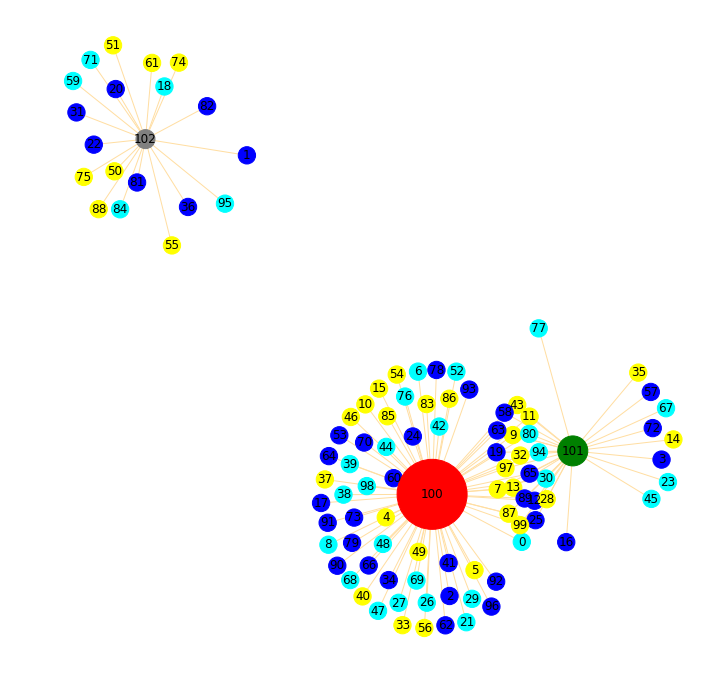

In [9]:
plot_network(G, colors, sizes)

### Clustering

In [10]:
def graphToEdgeMatrix(G): 
    # Initialize Edge Matrix 
    edgeMat = [[0 for x in range(len(G))] for y in range(len(G))] 
    
    # For loop to set 0 or 1 ( diagonal elements are set to 1) 
    for node in G: 
        tempNeighList = G.neighbors(node) 
        
        for neighbor in tempNeighList:         
            edgeMat[node][neighbor] = 1 
            edgeMat[node][node] = 1 
    
    return edgeMat

# Convert a networkx graph into an edge matrix
edgeMat = graphToEdgeMatrix(G)

**K-Means**

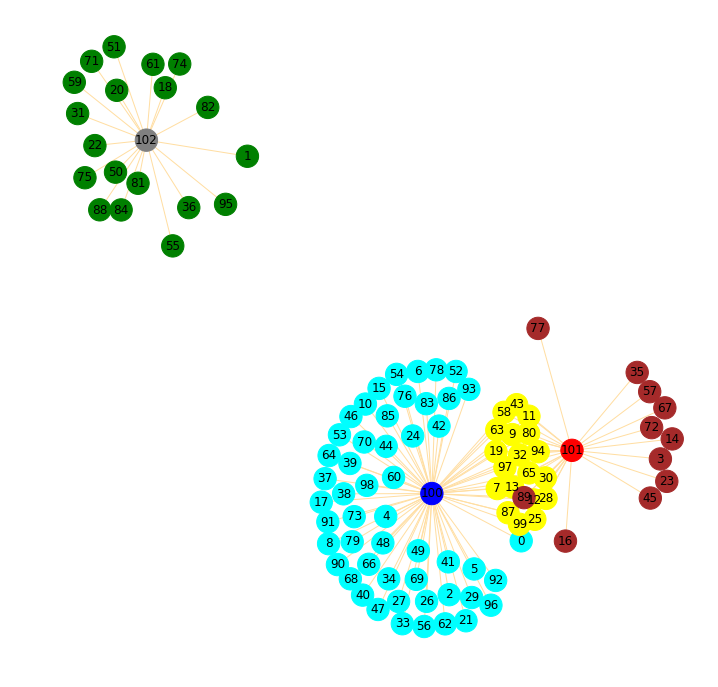

In [11]:
kClusters = 7

kmeans = cluster.KMeans(n_clusters=kClusters, n_init=200, random_state=1)
kmeans.fit(edgeMat)

colors = [color_map[lab] for lab in kmeans.labels_]
plot_network(G, colors, 500)

**Agglomerative Clustering**

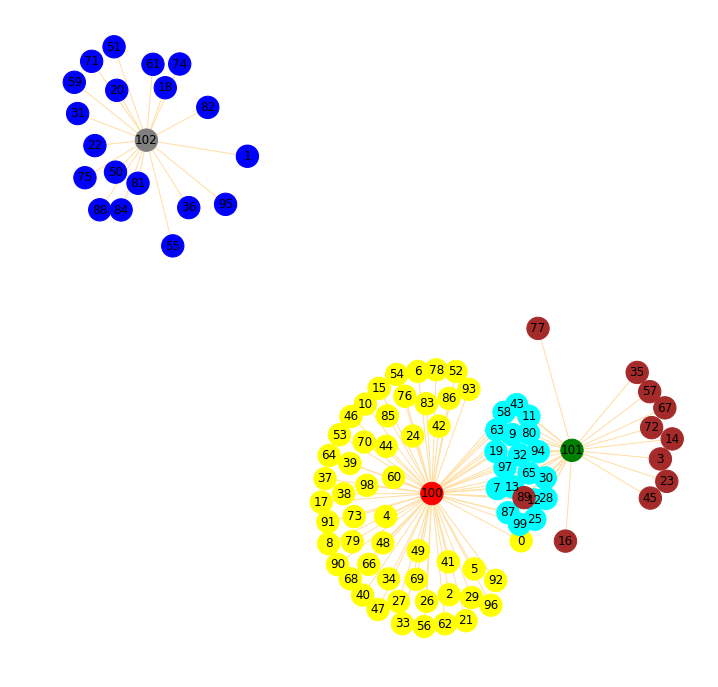

In [12]:
agglomerative = cluster.AgglomerativeClustering(n_clusters=kClusters, linkage="ward")
agglomerative.fit(edgeMat)

colors = [color_map[lab] for lab in agglomerative.labels_]
plot_network(G, colors, 500)